In [1]:
import pandas as pd

#Load dataset 
df = pd.read_csv(r"D:\Movie Review Sentiment Analysis!!!!!!!!!!!!!!! NLP project and i learning\IMDB Dataset.csv.zip")

#Show first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
import re

def clean_text(text):
    #Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    #convert to Lowercase
    text = text.lower()
    
    #Remove punctuation numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    #Remove extra spaces 
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

#Apply to the dataset
df['clean_review'] = df['review'].apply(clean_text)

#Show first few rows
df[["review", "clean_review"]].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


In [6]:
import nltk

In [7]:
# First remove any potentially corrupted downloads
nltk.download('punkt', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab', force=True)  # Specifically download punkt_tab

[nltk_data] Downloading package punkt to C:\Users\ABDULLAH AL
[nltk_data]     MAHMUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\ABDULLAH AL
[nltk_data]     MAHMUD\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\ABDULLAH AL
[nltk_data]     MAHMUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\ABDULLAH AL
[nltk_data]     MAHMUD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [8]:
#Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #Tokenize the text
    tokens = word_tokenize(text)
    
    #Remove stop words and Lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    #Join tokens back to string
    return ' '.join(cleaned_tokens)

#Apply to the dataset 
df['processed_review'] = df['clean_review'].apply(preprocess_text)

#Show first few rows
df[['clean_review', 'processed_review']].head()


,clean_review,processed_review
0,one of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,basically theres a family where a little boy j...,basically there family little boy jake think t...
4,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

#create countvectorizer object
vectorizer = CountVectorizer(max_features=5000) #limit to 5000 featurus

#Fit and transform text data
x = vectorizer.fit_transform(df['processed_review']).toarray()

#labels 
y = df['sentiment'].map({'positive':1, 'negative':0}) #Label encoding

print("Feature shape:", x.shape)

Feature shape: (50000, 5000)


In [10]:
print(vectorizer.get_feature_names_out()[:10]) #show first 10 features
print(x[0]) #first review feature vector

['aaron' 'abandoned' 'abc' 'ability' 'able' 'abrupt' 'absence' 'absent'
 'absolute' 'absolutely']
[0 0 0 ... 0 0 0]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#Model definition & training
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#Make predictions 
y_pred = model.predict(x_test)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.8712

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
 [[4292  669]
 [ 619 4420]]


In [12]:
#import necessary lib
import numpy as np

#Create boolean mask where prediction is positive
incorrect = np.where(y_pred != y_test)[0]

# Convert X_test index back to dataframe index
X_test_text = df.iloc[y_test.index]['review'].values

# Show 5 misclassified examples
for i in incorrect[:5]:
    print(f"Review:\n{X_test_text[i]}")
    print(f"True Sentiment: {y_test.values[i]} | Predicted: {y_pred[i]}")
    print('-'*80)

Review:
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defe

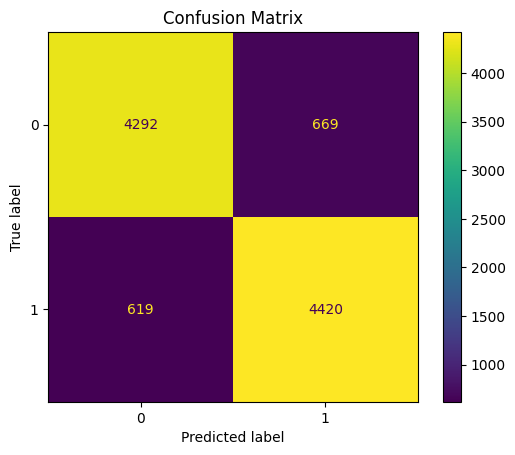

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


In [20]:
def predict_sentiment(text):
    # Clean the text (same as before)
    cleaned = clean_text(text)
    
    # Preprocess (tokenize, remove stopwords, lemmatize)
    processed = preprocess_text(cleaned)
    
    # Vectorize using the same vectorizer used in training
    vectorized = vectorizer.transform([processed])
    
    # Predict
    pred = model.predict(vectorized)[0]
    
    # Return result
    return "Positive 😊" if pred == 1 else "Negative 😞"

# Example usage:
print(predict_sentiment("This movie was absolutely fantastic!"))
print(predict_sentiment("The plot was boring and too slow."))


Positive 😊
Negative 😞


In [21]:
import gradio as gr

def predict_interface(text):
    return predict_sentiment(text)

interface = gr.Interface(fn=predict_interface,
                         inputs="text",
                         outputs="text",
                         title="🎬 Movie Review Sentiment Classifier",
                         description="Type a movie review and get sentiment prediction (Positive/Negative)")

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
